In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading data:

In [2]:
wine_data=pd.read_csv("C:\\Users\\JOTHISH N\\Desktop\\DS\\PCA\\wine.csv")

In [3]:
wine_data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Checking for null values:

In [4]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


## Checking for duplicated values:

In [5]:
wine_data[wine_data.duplicated()]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


There are no duplicate values:

## Removing the type column:

In [6]:
wine_final=wine_data.drop(['Type'],axis=1)

### Standard scaler

In [7]:
ss=StandardScaler()
x=ss.fit_transform(wine_final)

In [8]:
x

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## Transforming data with PCA:

In [9]:
pca=PCA()

In [10]:
pca_values=pca.fit_transform(wine_final)

In [11]:
var=np.cumsum(pca.explained_variance_ratio_)
var

array([0.99809123, 0.99982715, 0.99992211, 0.99997232, 0.99998469,
       0.99999315, 0.99999596, 0.99999748, 0.99999861, 0.99999933,
       0.99999971, 0.99999992, 1.        ])

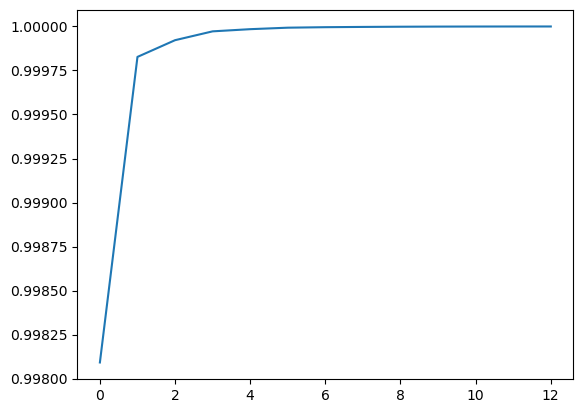

In [12]:
plt.plot(var)

<AxesSubplot:>

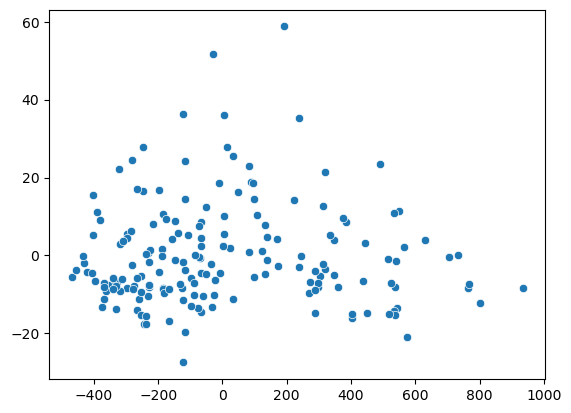

In [13]:
x = pca_values[:,0]
y = pca_values[:,1]
z = pca_values[:,2]
sns.scatterplot(x,y)

<AxesSubplot:>

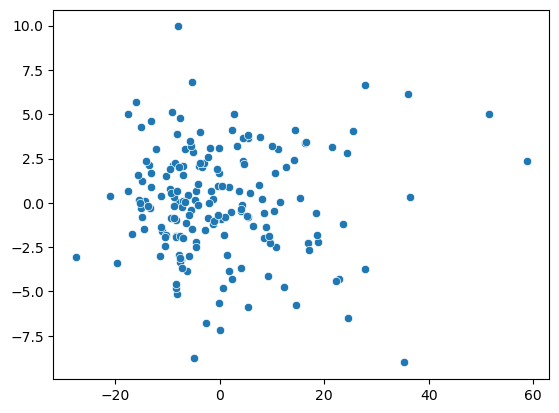

In [14]:
sns.scatterplot(y,z)

<AxesSubplot:>

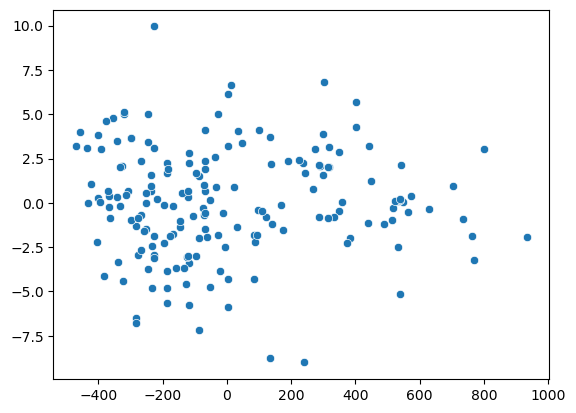

In [15]:
sns.scatterplot(x,z)

<function matplotlib.pyplot.show(close=None, block=None)>

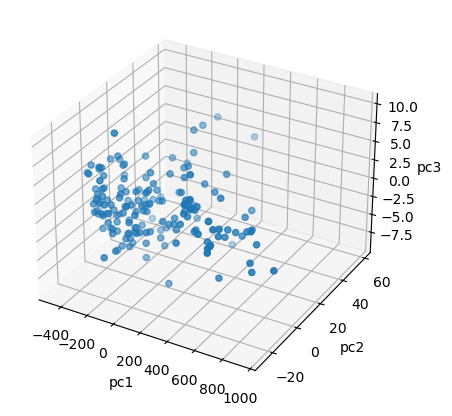

In [16]:
plt.figure(figsize=(6,5))
axes = plt.axes(projection='3d')
axes.scatter3D(x,y,z)
axes.set_xlabel('pc1')
axes.set_ylabel('pc2')
axes.set_zlabel('pc3')
plt.show

## Taking the first 3 components:

In [17]:
pca_values[:,:3]

array([[ 3.18562979e+02,  2.14921307e+01,  3.13073470e+00],
       [ 3.03097420e+02, -5.36471768e+00,  6.82283550e+00],
       [ 4.38061133e+02, -6.53730945e+00, -1.11322298e+00],
       [ 7.33240139e+02,  1.92729032e-01, -9.17257016e-01],
       [-1.15714285e+01,  1.84899946e+01, -5.54422076e-01],
       [ 7.03231192e+02, -3.32158674e-01,  9.49375334e-01],
       [ 5.42971581e+02, -1.35189666e+01,  2.12694283e+00],
       [ 5.48401860e+02,  1.14494324e+01,  4.04924202e-02],
       [ 2.98036863e+02, -8.18015784e+00,  3.88097517e+00],
       [ 2.98049553e+02, -7.10154294e+00,  1.55845533e+00],
       [ 7.63079712e+02, -8.33431723e+00, -1.88629037e+00],
       [ 5.32943228e+02, -1.42876338e+01,  1.30335240e-01],
       [ 5.72834410e+02, -2.10050143e+01,  3.72614859e-01],
       [ 4.02925358e+02, -1.61026352e+01,  5.67513986e+00],
       [ 8.00053394e+02, -1.21184472e+01,  3.04652991e+00],
       [ 5.63245578e+02,  2.21482866e+00, -5.25510985e-01],
       [ 5.33379651e+02,  1.08048022e+01

In [18]:
wine_final=pd.DataFrame(pca_values[0:,:3],columns=['pc1','pc2','pc3'])

In [19]:
wine_final

,pc1,pc2,pc3
0,318.562979,21.492131,3.130735
1,303.097420,-5.364718,6.822835
2,438.061133,-6.537309,-1.113223
3,733.240139,0.192729,-0.917257
4,-11.571428,18.489995,-0.554422
...,...,...,...
173,-6.980211,-4.541137,-2.474707
174,3.131605,2.335191,-4.309931
175,88.458074,18.776285,-2.237577
176,93.456242,18.670819,-1.788392


## Hierarchical clustering:

### Dendogram:

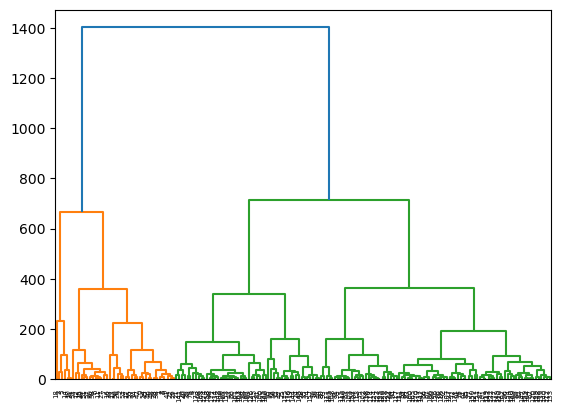

In [20]:
dendrogram = sch.dendrogram(sch.linkage(wine_final,'complete'))

### For 3 clusters:

In [21]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
a=hc.fit_predict(wine_final)
wine_data['cluster_id_hc']=pd.Series(a)
wine_data.cluster_id_hc.value_counts()

1    83
2    52
0    43
Name: cluster_id_hc, dtype: int64

In [22]:
wine_data.groupby('cluster_id_hc').mean()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
cluster_id_hc,,,,,,,,,,,,,,
0,1.000000,13.814419,1.898605,2.433721,16.758140,104.581395,2.854419,3.016279,0.286279,1.899767,5.775581,1.076512,3.101163,1214.930233
1,2.325301,12.543373,2.477711,2.319036,20.908434,93.385542,2.039639,1.674940,0.388313,1.413855,4.314096,0.926506,2.434699,485.783133
2,2.096154,13.057500,2.472692,2.386731,19.501923,105.884615,2.240385,1.778654,0.382115,1.618077,5.652308,0.908385,2.489423,776.634615


### For 4 clusters:

In [23]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')
a=hc.fit_predict(wine_final)
wine_data['cluster_id_hc']=pd.Series(a)
wine_data.cluster_id_hc.value_counts()

0    83
2    52
1    37
3     6
Name: cluster_id_hc, dtype: int64

In [24]:
wine_data.groupby('cluster_id_hc').mean()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
cluster_id_hc,,,,,,,,,,,,,,
0,2.325301,12.543373,2.477711,2.319036,20.908434,93.385542,2.039639,1.674940,0.388313,1.413855,4.314096,0.926506,2.434699,485.783133
1,1.000000,13.762162,1.909459,2.437297,16.837838,104.081081,2.789459,2.938919,0.288649,1.848378,5.539189,1.070541,3.112973,1163.783784
2,2.096154,13.057500,2.472692,2.386731,19.501923,105.884615,2.240385,1.778654,0.382115,1.618077,5.652308,0.908385,2.489423,776.634615
3,1.000000,14.136667,1.831667,2.411667,16.266667,107.666667,3.255000,3.493333,0.271667,2.216667,7.233333,1.113333,3.028333,1530.333333


### For 5 clusters:

In [25]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')
a=hc.fit_predict(wine_final)
wine_data['cluster_id_hc']=pd.Series(a)
wine_data.cluster_id_hc.value_counts()

3    55
2    52
0    37
4    28
1     6
Name: cluster_id_hc, dtype: int64

In [26]:
wine_data.groupby('cluster_id_hc').mean()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
cluster_id_hc,,,,,,,,,,,,,,
0,1.000000,13.762162,1.909459,2.437297,16.837838,104.081081,2.789459,2.938919,0.288649,1.848378,5.539189,1.070541,3.112973,1163.783784
1,1.000000,14.136667,1.831667,2.411667,16.266667,107.666667,3.255000,3.493333,0.271667,2.216667,7.233333,1.113333,3.028333,1530.333333
2,2.096154,13.057500,2.472692,2.386731,19.501923,105.884615,2.240385,1.778654,0.382115,1.618077,5.652308,0.908385,2.489423,776.634615
3,2.454545,12.641636,2.591636,2.358545,21.161818,94.945455,1.870909,1.419273,0.407636,1.315455,4.943455,0.876727,2.262909,541.509091
4,2.071429,12.350357,2.253929,2.241429,20.410714,90.321429,2.371071,2.177143,0.350357,1.607143,3.077857,1.024286,2.772143,376.321429


### 4 clusters seems to work best:

## K-Means clustering:

### Elbow Graph:

In [27]:
# Import Libraries
from sklearn.cluster import KMeans

In [28]:
# As we already have normalized data
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change.

In [31]:
# within-cluster sum-of-squares criterion 
wcss=[]
for i in range(1,6):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(wine_final)
    wcss.append(kmeans.inertia_)

AttributeError: 'NoneType' object has no attribute 'split'

ValueError: x and y must have same first dimension, but have shapes (5,) and (0,)

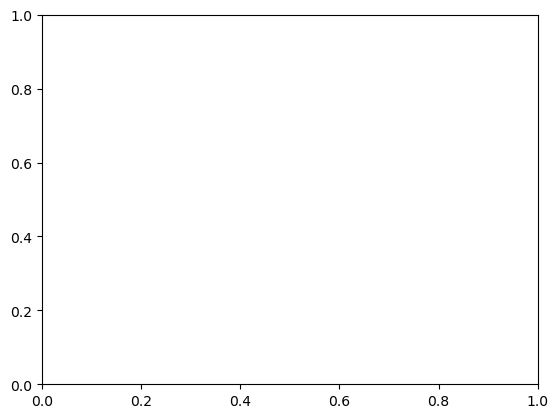

In [30]:
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,6),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### At 3 clusters the steepness of the graph decreases:

In [32]:
    kmeans = KMeans(n_clusters=3,random_state=0)
    kmeans.fit(wine_final)

KMeans(n_clusters=3, random_state=0)

In [33]:
kmeans.labels_

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2])

In [34]:
wine_data['cluster_id_kmeans']=pd.Series(kmeans.labels_)
wine_data.cluster_id_kmeans.value_counts()

2    69
0    62
1    47
Name: cluster_id_kmeans, dtype: int64

In [35]:
wine_data.groupby('cluster_id_kmeans').mean()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster_id_hc
cluster_id_kmeans,,,,,,,,,,,,,,,
0,2.258065,12.929839,2.504032,2.408065,19.890323,103.596774,2.111129,1.584032,0.388387,1.503387,5.650323,0.883968,2.365484,728.338710,2.225806
1,1.021277,13.804468,1.883404,2.426170,17.023404,105.510638,2.867234,3.014255,0.285319,1.910426,5.702553,1.078298,3.114043,1195.148936,0.297872
2,2.275362,12.516667,2.494203,2.288551,20.823188,92.347826,2.070725,1.758406,0.390145,1.451884,4.086957,0.941159,2.490725,458.231884,3.405797


In [36]:
wine_data.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [37]:
wine_data.groupby('Type').mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster_id_hc,cluster_id_kmeans
Type,,,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864,0.644068,0.779661
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042,3.154930,1.422535
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833,2.604167,0.791667


In [38]:
#In the original data, the number of clusters was 3. With k means clustering, we got the ideal number of clusters to be 3: 

In [39]:
# But with hierarchial clustering we got the ideal number of clusters to be 4:

### Plotting clustered data:

In [40]:
wine_final['cluster_id_hc']=wine_data['cluster_id_hc']
wine_final['cluster_id_kmeans']=wine_data['cluster_id_kmeans']
wine_final['Type']=wine_data['Type']

### k means clustering:

<function matplotlib.pyplot.show(close=None, block=None)>

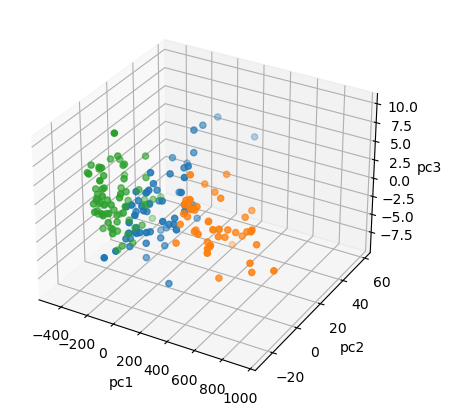

In [41]:
plt.figure(figsize=(6,5))
axes = plt.axes(projection='3d')
axes.scatter3D(wine_final[wine_final['cluster_id_kmeans']==0].pc1,wine_final[wine_final['cluster_id_kmeans']==0].pc2,wine_final[wine_final['cluster_id_kmeans']==0].pc3,'c1')
axes.scatter3D(wine_final[wine_final['cluster_id_kmeans']==1].pc1,wine_final[wine_final['cluster_id_kmeans']==1].pc2,wine_final[wine_final['cluster_id_kmeans']==1].pc3,'c2')
axes.scatter3D(wine_final[wine_final['cluster_id_kmeans']==2].pc1,wine_final[wine_final['cluster_id_kmeans']==2].pc2,wine_final[wine_final['cluster_id_kmeans']==2].pc3,'c3')
axes.set_xlabel('pc1')
axes.set_ylabel('pc2')
axes.set_zlabel('pc3')

plt.show

### hierarchical clustering:

<function matplotlib.pyplot.show(close=None, block=None)>

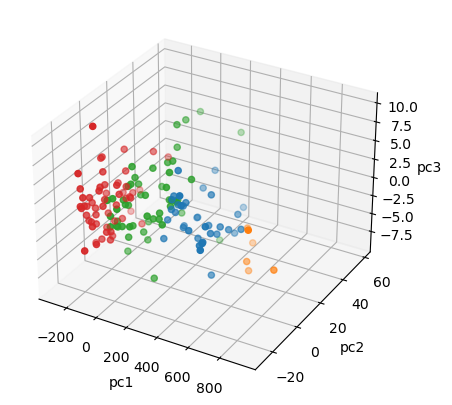

In [42]:
plt.figure(figsize=(6,5))
axes = plt.axes(projection='3d')
axes.scatter3D(wine_final[wine_final['cluster_id_hc']==0].pc1,wine_final[wine_final['cluster_id_hc']==0].pc2,wine_final[wine_final['cluster_id_hc']==0].pc3,'c1')
axes.scatter3D(wine_final[wine_final['cluster_id_hc']==1].pc1,wine_final[wine_final['cluster_id_hc']==1].pc2,wine_final[wine_final['cluster_id_hc']==1].pc3,'c2')
axes.scatter3D(wine_final[wine_final['cluster_id_hc']==2].pc1,wine_final[wine_final['cluster_id_hc']==2].pc2,wine_final[wine_final['cluster_id_hc']==2].pc3,'c3')
axes.scatter3D(wine_final[wine_final['cluster_id_hc']==3].pc1,wine_final[wine_final['cluster_id_hc']==3].pc2,wine_final[wine_final['cluster_id_hc']==3].pc3,'c4')
axes.set_xlabel('pc1')
axes.set_ylabel('pc2')
axes.set_zlabel('pc3')

plt.show

### The data is plotted with the given 'Type' column:

<function matplotlib.pyplot.show(close=None, block=None)>

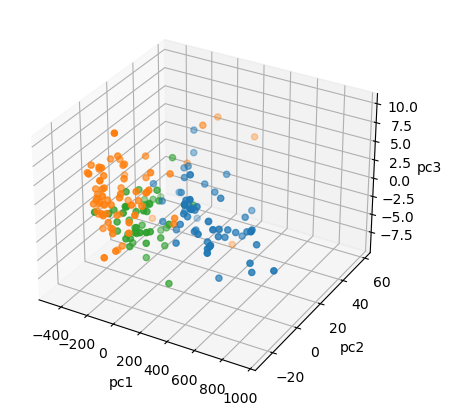

In [43]:
plt.figure(figsize=(6,5))
axes = plt.axes(projection='3d')
axes.scatter3D(wine_final[wine_final['Type']==1].pc1,wine_final[wine_final['Type']==1].pc2,wine_final[wine_final['Type']==1].pc3,'c1')
axes.scatter3D(wine_final[wine_final['Type']==2].pc1,wine_final[wine_final['Type']==2].pc2,wine_final[wine_final['Type']==2].pc3,'c2')
axes.scatter3D(wine_final[wine_final['Type']==3].pc1,wine_final[wine_final['Type']==3].pc2,wine_final[wine_final['Type']==3].pc3,'c3')
axes.set_xlabel('pc1')
axes.set_ylabel('pc2')
axes.set_zlabel('pc3')

plt.show